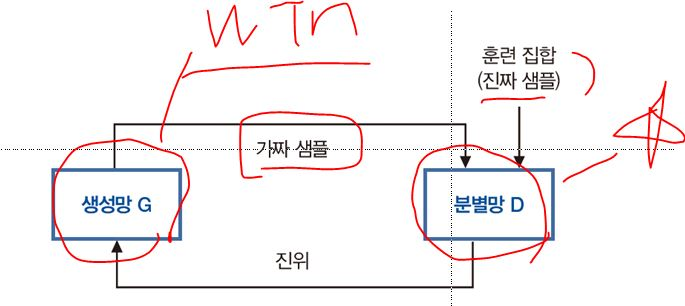

In [1]:
from IPython import display
display.Image('E:/1 강남야간/img/038.jpg',width=500, height=500)

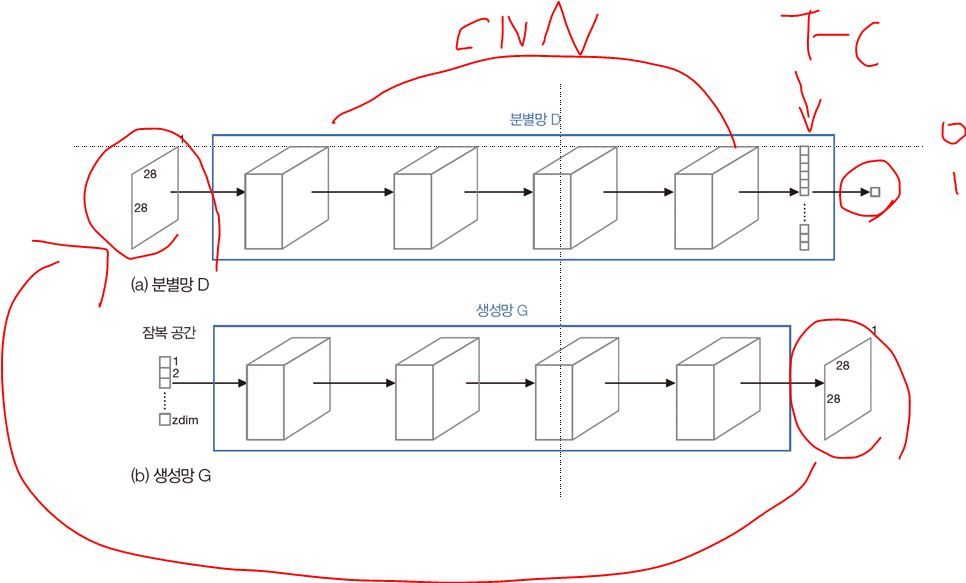

In [2]:
#구조
from IPython import display
display.Image('E:/1 강남야간/img/039.jpg',width=500, height=500)

In [3]:
# MNIST를 가지고 GAN 을 구현하는 프로그램

In [16]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Activation,Dense,Flatten,Reshape,Conv2D,Conv2DTranspose,Dropout,BatchNormalization,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPool2D
import tensorflow as tf

In [6]:
# mnist 데이터를 load
(x_train,y_train),(x_test,y_test) =  mnist.load_data() 

In [11]:
x_train =  (x_train.astype(np.float32)/255.0)*2.0-1.0  # -1  ~ 1
x_test = (x_test.astype(np.float32)/255.0)*2.0-1.0  # -1  ~ 1
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [12]:
batch_size = 64
epoch=5000
dropout_rate = 0.4
batch_norm = 0.9
zdim = 100

In [17]:
# 분별망
discriminator_input =  Input(shape=(28,28,1))
x = Conv2D(32,(3,3),activation='relu',padding='same')(discriminator_input)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = MaxPool2D()(x)
x = Dropout(dropout_rate)(x)

x = Conv2D(64,(3,3),activation='relu',padding='same')(discriminator_input)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = MaxPool2D()(x)
x = Dropout(dropout_rate)(x)

x = Flatten()(x)
discriminator_output =  Dense(1,activation='sigmoid')(x)
discriminator = Model(discriminator_input, discriminator_output)
discriminator.compile(optimizer='Adam', loss = tf.keras.losses.binary_crossentropy,metrics=['accuracy'])